# Упражнение 1 - Numpy

In [3]:
import numpy as np

1. Пусть у двух матриц совпадает количество строк. Объедините их в одну горизонтально (объедините столбцы этих матриц)

In [6]:
A1 = np.array([[1, 2, 3], [4, 5, 6]])
A2 = np.array([[2, 4, 6], [8, 10, 12]])

np.concatenate((A1, A2), axis=1)

array([[ 1,  2,  3,  2,  4,  6],
       [ 4,  5,  6,  8, 10, 12]])

2. Пусть дана numpy-матрица $M$ и два массива индексов $a, b$ одинаковой длины. Постройте массив элементов $M[a[0], b[0]], M[[a[1], b[1]]], ... $ Указание: для выполнения этой операции не требуется никаких именных функций.

In [111]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

a = np.array([1, 0, 2, 1])
b = np.array([2, 0, 0, 1])

result = np.empty(4)

for i in range(len(a)):
    result[i] = M[a[i], b[i]]

result

array([6., 1., 7., 5.])

3. Подсчитайте след матрицы и количество ненулевых элементов на ее диагонали

In [42]:
print(np.trace(M))

np.count_nonzero(np.diagonal(M))

15


3

4. Даны два произвольных numpy-массива одинаковой размерности $(n, m)$. Замените нулями те элементы второго массива, для которых на соответствующем месте в первом массиве находятся отрицательные числа

In [141]:
size = (2, 3)

rand_arr = lambda: np.random.randint(-10, 10, size)
arrays = np.empty((2,)+size)

for i in range(2):
    arrays[i] = rand_arr()
print(arrays)

it = np.nditer(np.empty(size), flags=['multi_index'])

for a in it:
    if arrays[(0,)+it.multi_index] < 0:
        arrays[(1,)+it.multi_index] = 0

arrays

[[[-7. -1. -2.]
  [ 1.  3.  2.]]

 [[-7.  4.  7.]
  [-5.  2. -6.]]]


array([[[-7., -1., -2.],
        [ 1.,  3.,  2.]],

       [[ 0.,  0.,  0.],
        [-5.,  2., -6.]]])

5. Даны две матрицы с одинаковым количеством строк и количеством столбцов $n$ и $m$ соответственно. Постройте матрицу $m \times m$
 всевозможных произведений столбцов друг на друга (в смысле скалярного произведения).

In [142]:
print(arrays)

products = np.empty((size[1], size[1]))

with np.nditer(products, flags=['multi_index'], op_flags=['readwrite']) as it:
    for value in it:
        value[...] = np.dot(arrays[0, :, it.multi_index[0]], arrays[1, :, it.multi_index[1]])
    
products

[[[-7. -1. -2.]
  [ 1.  3.  2.]]

 [[ 0.  0.  0.]
  [-5.  2. -6.]]]


array([[ -5.,   2.,  -6.],
       [-15.,   6., -18.],
       [-10.,   4., -12.]])

# Упражнение 2 - Matplotlib

1. Постройте таблицу $2 \times 2$ из четырех графиков (см. функцию plt.subplots)

In [145]:
import matplotlib.pyplot as plt

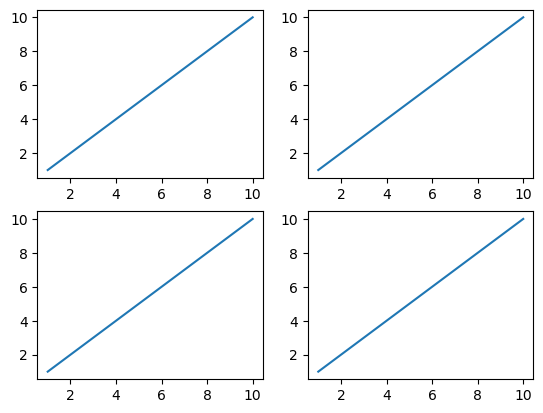

In [176]:
x = np.array([1, 10])
y = np.array([1, 10])

fig, axs = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        axs[i, j].plot(x, y)

2. Постройте график с крестами ошибок

<ErrorbarContainer object of 3 artists>

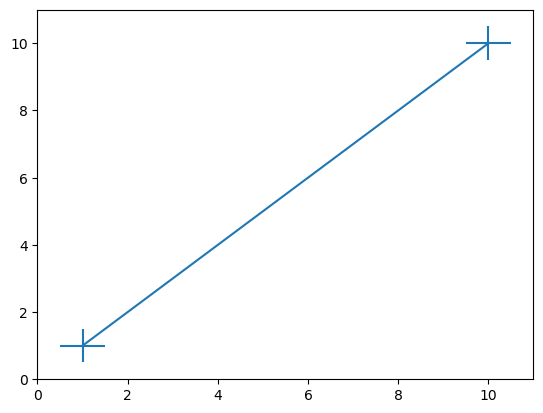

In [178]:
plt.errorbar(x, y, 0.5, 0.5)

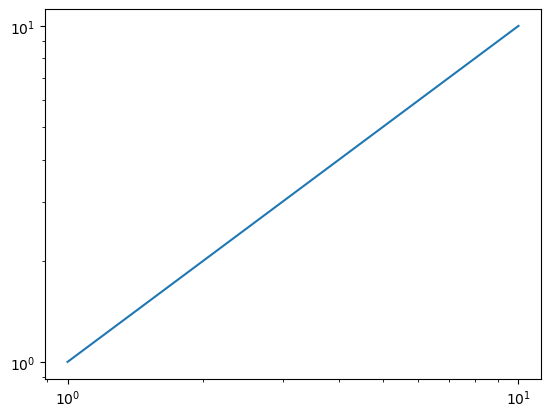

In [185]:
plt.loglog(x, y)

# Упражнение 3 - Погрешности

1. Оценить погрешность в определении корней уравнения $ay^3 + d = 0$, если величины $a = 1$ и $d = 8$ заданы с точностью $\Delta(a) = 10^{-3}$ и $\Delta(d) = 10^{-3}$

\begin{split}
\begin{equation}
    y^3 = -\frac{d}{a}\\
    \sigma\left(y^3\right) = \sigma(d) + \sigma(a)\\
    \sigma(y) = \frac{1}{3} \sigma\left(y^3\right)\\
    \sigma(y) = \frac{1}{3} \left(\frac{10^{-3}}{1} + \frac{10^{-3}}{8}\right) = \frac{3}{8} * 10^{-3}\\
    \Delta(y) = \left| \sigma (y) \sqrt[3]{-\frac{1}{8}} \right| = \frac{3}{16} * 10^{-3} = 0.1875 * 10^{-3}
\end{equation}
\end{split}

2. Определить оптимальный шаг численного дифференцирования $h_{opt}$ при использовании для вычисления производной приближенной формулы

\begin{equation}
    u'x \approx \frac{u(x-2h) - 8u(x - h) + 8u(x + h) - u(x + 2h)}{12h},
\end{equation}

Какой порядок аппроксимации имеет эта формула? Известно, что, $\left|u^{(5)}(t)\right| \leq M_5$
, а значения функций вычисляются с точностью $\Delta u$.

\begin{split}
\begin{equation}
    \frac{u(x-2h) - 8u(x - h) + 8u(x + h) - u(x + 2h)}{12h} = \\
    = \frac{u(x) -2hu'(x) + 4h^2u''(x) - 8u(x) + 8hu'(x) - 8h^2u''(x) + 8u(x) + 8hu'(x) + 8h^2u''(x) - u(x) - 2hu'(x) - 4h^2u''(x)}{12h} +\\
    + \frac{-8h^3u'''(x) +16h^4u^{(4)} -32h^5u^{(5)} + 8h^3u'''(x) - 8h^4u^{(4)} + 8h^5u^{(5)} + 8h^3u'''(x) + 8h^4u^{(4)} + 8h^5u^{(5)} - 8h^3u'''(x) - 16h^4u^{(4)} - 32h^5u^{(5)} + O(h^6)}{12h}\\
    = u'(x) - 4h^4u^{(5)} + O(h^5) - 4 \, порядок \, аппроксимации
\end{equation}
\end{split}

$\Delta_{method} = 4h^4u^{(5)} = 4M_5h^4; \; \Delta_{round} = \frac{3}{2}\frac{\Delta u}{h}; \; \Delta = 4M_5h^4 + \frac{3}{2}\frac{\Delta u}{h}$

\begin{split}
\begin{equation}
    \frac{\partial{\Delta}}{\partial{h}} = 16 M_5 h^3 - \frac{3}{2} \frac{\Delta u}{h^2} = 0\\
    h_{opt} = \frac{1}{2}\sqrt[5]{\frac{3\Delta u}{M_5}}\\
    \Delta(h_{opt}) = \frac{1}{4}\sqrt[5]{3\Delta u M_5^{\frac{1}{4}}} + \sqrt[5]{(3\Delta u)^4 M_5}
\end{equation}
\end{split}

# Упражнение 4 - Погрешность определения корня уравнения

С каким числом верных знаков (или относительной погрешностью) должен быть известен свободный член в уравнении $x^2 - 2x + 0.999993751 = 0$, чтобы корни имели четыре верных знака?

\begin{split}
\begin{equation}
    x = 1 \pm \sqrt{1 - a}; \; a = 0.999993751\\
    \sigma(x) < 5 * 10^{-4}\\
\end{equation}
\end{split}

\begin{split}
\begin{equation}
    \sigma(x) = \frac{\Delta\left(\sqrt{1-a} \,\right)}{1 \pm \sqrt{1-a}} = 
    \frac{\sigma\left(\sqrt{1-a} \,\right) \,  \sqrt{1-a}}{1 \pm \sqrt{1-a}} = 
    \frac{\frac{1}{2}\sigma\left(1-a \,\right) \,  \sqrt{1-a}}{1 \pm \sqrt{1-a}} = 
    \frac{\frac{1}{2}\frac{\Delta a}{1-a} \,  \sqrt{1-a}}{1 \pm \sqrt{1-a}} =
    \frac{\Delta a}{2\left(\sqrt{1 - a} \pm (1-a)\right)}\\
    \Delta a = min\{2(\sqrt{1-a} \pm (1-a))\sigma (x)\} = 
    2(\sqrt{1-a} - (1-a))\sigma (x) \approx 2.5 * 10^{-6}\\
    \sigma(a) = \frac{\Delta a}{a} \approx 2.5 * 10^{-6}
\end{equation}
\end{split}

# Упражнение 5 - Рост погрешности в последовательности

Пусть задана последовательность чисел $x_n, n \in \mathbb{N}_0$, причем $5x_{n+1} - x_n = 4$, а $x_0$ известно с относительной погрешностью $10^{-6}$. При каких значениях $x_0$ относительная погрешность при вычислении $x_n$ будет быстро возрастать с ростом n?

\begin{split}
\begin{equation}
    x_{n+1} = \frac{4 + x_n}{5}\\
    \Delta x_{n+1} = \frac{\Delta x_n}{5}\\
    \sigma (x_{n+1}) = \frac{\Delta x_n}{5|x_{n+1}|} = \sigma(x_n) \left|\frac{x_n}{5 x_{n+1}}\right| =
    \sigma(x_n) \left|\frac{x_n}{4 + x_n}\right| = \frac{\sigma(x_n)}{\left|1 + \frac{4}{x_n}\right|} < \sigma(x_n)\\
    \left|1 + \frac{4}{x_n}\right| < 1
\end{equation}
\end{split}

$$
\frac{1}{\left|1 + \frac{4}{x_n}\right|} \gg 1 \Leftrightarrow \left|1 + \frac{4}{x_n}\right| \ll 1 
\Leftrightarrow 1 - \frac{4}{|x_n|} \ll 0, \, x_n < 0 \Leftrightarrow x_n \approx -4 \\
x_0 = -4 + \varepsilon; \; x_1 = \frac{\varepsilon}{5}; \; \sigma(x_1) = \left|1 - \frac{4}{\varepsilon}\right|\sigma(x_0) \gg 1\\
x_2 = \frac{20 + \varepsilon}{25}; \; \sigma(x_2) = \frac{\sigma(x_1)}{\left|1 + \frac{4}{x_1}\right|} = \left|1 - \frac{16}{\varepsilon +20}\right| \approx 0.2\\
x_3 = \frac{120 + \epsilon}{125} \approx 1; \; \sigma(x_3) = \left|1 - \frac{1}{121 + \varepsilon}\right| \approx 1
$$

для $n > 3: x_n \approx 1; \; \sigma(x_n) \approx \frac{1}{5^{n-3}}$